In [37]:
import tensorflow as tf
from keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Building NN model

In [2]:
input_shape = 300
output_shape = 3
model = models.Sequential()
model.add(layers.Dense(128, activation='sigmoid', input_shape=(input_shape,))) 
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(output_shape, activation='softmax')) 


In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 55427 (216.51 KB)
Trainable params: 55427 (216.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Load Data

In [8]:
X_train = np.load('Data/Vectors/X_train.npy')
Y_train = np.load('Data/Vectors/Y_train.npy')
X_test = np.load('Data/Vectors/X_test.npy')
Y_test = np.load('Data/Vectors/Y_test.npy')
X_validation = np.load('Data/Vectors/X_validate.npy')
Y_validation = np.load('Data/Vectors/Y_validate.npy')

# Train

In [10]:
model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/5
5348/5348 [==============================] - 17s 3ms/step - loss: 0.2687 - accuracy: 0.9059 - val_loss: 0.2654 - val_accuracy: 0.9048
Epoch 2/5
5348/5348 [==============================] - 26s 5ms/step - loss: 0.2647 - accuracy: 0.9069 - val_loss: 0.2617 - val_accuracy: 0.9060
Epoch 3/5
5348/5348 [==============================] - 23s 4ms/step - loss: 0.2618 - accuracy: 0.9077 - val_loss: 0.2626 - val_accuracy: 0.9077
Epoch 4/5
5348/5348 [==============================] - 19s 4ms/step - loss: 0.2595 - accuracy: 0.9081 - val_loss: 0.2585 - val_accuracy: 0.9075
Epoch 5/5
5348/5348 [==============================] - 16s 3ms/step - loss: 0.2576 - accuracy: 0.9094 - val_loss: 0.2564 - val_accuracy: 0.9091


# Evaluate

In [48]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

669/669 [==============================] - 2s 2ms/step - loss: 0.2564 - accuracy: 0.9091
Loss: 0.2563967704772949, Accuracy: 0.9091291427612305


# Confusion Matrix

669/669 [==============================] - 1s 2ms/step


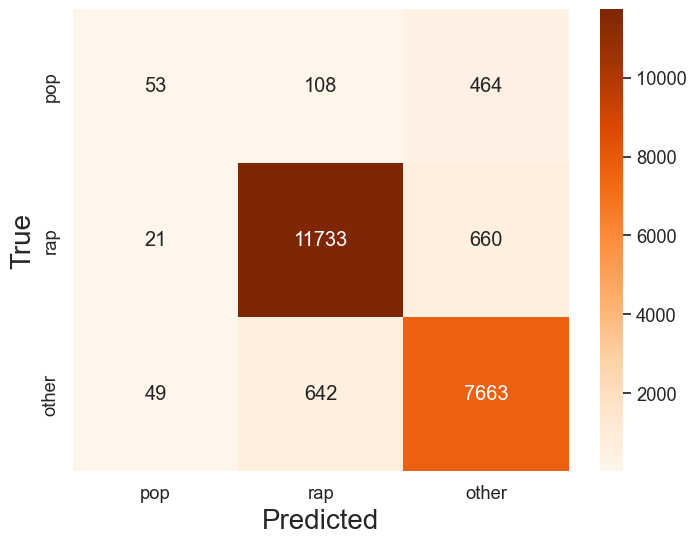

In [35]:
# Assuming you have predicted values stored in 'Y_pred'
Y_pred = model.predict(X_test)

# Convert one-hot encoded vectors back to categorical values
Y_test_categorical = np.argmax(Y_test, axis=1)
Y_pred_categorical = np.argmax(Y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['pop','rap', 'other'], yticklabels=['pop', 'rap', 'other'])
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.show()


In [46]:
# Assuming you have predicted values stored in 'Y_pred_categorical' and true labels stored in 'Y_test_categorical'

# Accuracy
accuracy = accuracy_score(Y_test_categorical, Y_pred_categorical)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Precision: {precision}")

# Recall
recall = recall_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(Y_test_categorical, Y_pred_categorical, average=None)  # You can choose 'micro', 'macro', 'weighted', or 'samples' as per your requirement
print(f"F1-Score: {f1}")


Accuracy: 0.9091291543962978
Precision: [0.43089431 0.93991829 0.87208376]
Recall: [0.0848     0.94514258 0.91728513]
F1-Score: [0.14171123 0.9425232  0.89411353]
